In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [2]:
#Read dfs

WSL2024_Player_stats_def=pd.read_excel("C:/Users/theod/Desktop/SPORTS ANALYTICS/WSL/Player_stats_def.xlsx")
WSL2024_Player_stats_goalshootcre=pd.read_excel("C:/Users/theod/Desktop/SPORTS ANALYTICS/WSL/Player_stats_goalshootcre.xlsx")
WSL2024_Player_stats_misc = pd.read_excel("C:/Users/theod/Desktop/SPORTS ANALYTICS/WSL/Player_stats_misc.xlsx")
WSL2024_Player_stats_passing = pd.read_excel("C:/Users/theod/Desktop/SPORTS ANALYTICS/WSL/Player_stats_passing.xlsx")
WSL2024_Player_stats_poss = pd.read_excel("C:/Users/theod/Desktop/SPORTS ANALYTICS/WSL/Player_stats_poss.xlsx")
WSL2024_Player_stats_shooting2024 = pd.read_excel("C:/Users/theod/Desktop/SPORTS ANALYTICS/WSL/Player_stats_shooting2024.xlsx")
WSL2024_Player_stats_type_pass = pd.read_excel("C:/Users/theod/Desktop/SPORTS ANALYTICS/WSL/Player_stats_type_pass.xlsx")



In [3]:
#common columns
common_columns = ['Rk', 'Nation', 'Pos', 'Age', 'Born', '90s']

# remove common columns from all df before merge
def remove_common_columns(df, common_columns):
    return df[[col for col in df.columns if col not in common_columns]]

# New DataFrames without common columns
df_def = remove_common_columns(WSL2024_Player_stats_def, common_columns)
df_goalshootcre = remove_common_columns(WSL2024_Player_stats_goalshootcre, common_columns)
df_misc = remove_common_columns(WSL2024_Player_stats_misc, common_columns)
df_passing = remove_common_columns(WSL2024_Player_stats_passing, common_columns)
df_poss = remove_common_columns(WSL2024_Player_stats_poss, common_columns)
df_shooting2024 = remove_common_columns(WSL2024_Player_stats_shooting2024, common_columns)
df_type_pass = remove_common_columns(WSL2024_Player_stats_type_pass, common_columns)

# Merge DataFrames with common columns
merged_df = pd.merge(WSL2024_Player_stats_def[['Player', 'Squad'] + common_columns], df_def, on=['Player', 'Squad'], how='outer')
merged_df = pd.merge(merged_df, df_goalshootcre, on=['Player', 'Squad'], how='outer')
merged_df = pd.merge(merged_df, df_misc, on=['Player', 'Squad'], how='outer')
merged_df = pd.merge(merged_df, df_passing, on=['Player', 'Squad'], how='outer')
merged_df = pd.merge(merged_df, df_poss, on=['Player', 'Squad'], how='outer')
merged_df = pd.merge(merged_df, df_shooting2024, on=['Player', 'Squad'], how='outer')
merged_df = pd.merge(merged_df, df_type_pass, on=['Player', 'Squad'], how='outer')

# fill in NaN cells with 0
merged_df_filled = merged_df.fillna(0)

In [4]:
merged_df_filled

,Player,Squad,Rk,Nation,Pos,Age,Born,90s,Tackles,Tackles Won_x,...,Switches,Crosses_y,Throw-ins Taken,Corner Kicks,Inswinging Corner Kicks,Outswinging Corner Kicks,Straight Corner Kicks,Passes Completed_y,Passes Offside,Passes Blocked_y
0,Princess Ademiluyi,West Ham,1,eng ENG,"MF,FW",17.0,2006.0,1.0,3,3,...,1,2,0,0,0,0,0,24,0,3
1,Michelle Agyemang,Arsenal,2,eng ENG,FW,17.0,2006.0,0.1,0,0,...,0,0,0,0,0,0,0,3,0,0
2,Alyssa Aherne,Everton,3,eng ENG,MF,19.0,2004.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Olga Ahtinen,Tottenham,4,fi FIN,MF,0.0,0.0,10.3,15,11,...,4,31,2,24,12,6,0,533,6,24
4,Asmita Ale,Leicester City,5,eng ENG,DF,21.0,2001.0,3.3,8,6,...,0,0,33,0,0,0,0,133,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,Shelina Zadorsky,Tottenham,300,ca CAN,DF,30.0,1992.0,1.3,4,4,...,0,3,16,0,0,0,0,35,1,6
300,Katie Zelem,Manchester Utd,301,eng ENG,MF,27.0,1996.0,22.0,72,50,...,2,145,3,107,35,34,24,1177,8,26
301,Julia Zigiotti Olme,Brighton,302,se SWE,MF,25.0,1997.0,17.4,48,25,...,2,13,5,2,1,1,0,650,5,27
302,Manuela Zinsberger,Arsenal,303,at AUT,GK,27.0,1995.0,18.0,0,0,...,0,0,0,0,0,0,0,519,1,1


In [5]:
# drop all the columns with _y in the end

WSL2024a = [col for col in merged_df_filled.columns if not col.endswith('_y')]
WSL2024a = merged_df_filled[WSL2024a]


In [6]:
# rename the columns with _x in the end
WSL2024a = WSL2024a.rename(columns=lambda x: x.replace('_x', '') if x.endswith('_x') else x)


In [7]:
#Exporting DataFrame to an Excel file
output_file_path = "C:/Users/theod/Desktop/SPORTS ANALYTICS/WSL/WSL2024.xlsx"
WSL2024a.to_excel(output_file_path, index=False)  # index=False για να μην συμπεριληφθεί η στήλη του index στο αρχείο

In [8]:
# Loading the DataFrame from an Excel file
df = pd.read_excel("C:/Users/theod/Desktop/SPORTS ANALYTICS/WSL/WSL2024.xlsx")

In [9]:
# Using the above functions
positions = ['DF', 'MF', 'FW']

In [10]:
# Defining features for each category
features_DF = [
    'Tackles', 'Tackles Won', 'Tackles (Def 3rd)', 'Dribblers Tackled', 'Dribbles Challenged', 
    '% of Dribblers Tackled', 'Challenges Lost', 'Blocks', 'Shots Blocked', 'Passes Blocked', 
    'Interceptions', 'Tkl+Int', 'Clearances', 'Errors', 'Fouls Committed', 'Fouls Drawn', 
    'CrdY', 'CrdR', '2CrdY', 'Progressive Passes'
]

features_MF = [
    'Tackles (Mid 3rd)', 'Tackles (Att 3rd)', 'Interceptions', 'Tkl+Int', 'Shot-Creating Actions', 
    'Shot-Creating Actions/90', 'SCA (Live-ball Pass)', 'SCA (Dead-ball Pass)', 'SCA (Take-On)', 
    'SCA (Shot)', 'SCA (Fouls Drawn)', 'SCA (Defensive Action)', 'Goal-Creating Actions', 
    'Goal-Creating Actions/90', 'GCA (Live-ball Pass)', 'GCA (Dead-ball Pass)', 'GCA (Take-On)', 
    'GCA (Shot)', 'GCA (Fouls Drawn)', 'GCA (Defensive Action)', 'Fouls Committed', 'Fouls Drawn', 
    'CrdY', 'CrdR', '2CrdY', 'Touches', 'Touches (Def Pen)', 'Touches (Def 3rd)', 'Touches (Mid 3rd)', 
    'Touches (Att 3rd)', 'Touches (Att Pen)', 'Touches (Live-Ball)', 'Passes into Final Third', 
    'Passes into Penalty Area', 'Progressive Passes', 'Key Passes', 'Crosses', 'Crosses into Penalty Area', 
    'Take-Ons Attempted', 'Successful Take-Ons', 'Successful Take-On %', 'Carries', 'Total Carrying Distance', 
    'Progressive Carrying Distance', 'Progressive Carries', 'Carries into Final Third', 'Carries into Penalty Area', 
    'Average Shot Distance', 'Shots Total', 'Shots on Target', 'Goals', 'Shots from Free Kicks'
]

features_FW = [
    'Goals', 'Shots Total', 'Shots on Target', 'Shots on Target %', 'Shots Total/90', 'Shots on target/90', 
    'Goals/Shot', 'Goals/Shot on Target', 'Average Shot Distance', 'Shots from Free Kicks', 'Penalty Kicks Made', 
    'Penalty Kicks Attempted', 'xG - Expected Goals', 'Non-Penalty xG', 'npxG/Shot', 'Goals minus Expected Goals', 
    'Non-Penalty Goals minus Non-Penalty Expected Goals'
]

In [11]:
# Defining features by category
features_by_pos = {
    'DF': features_DF,
    'MF': features_MF,
    'FW': features_FW
}

In [12]:
# Data preprocessing
def preprocess_data(df, features):
    X = df[features].dropna()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, df[features].dropna().index

In [13]:
# PCA
def apply_pca(X_scaled, n_components=2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    return X_pca, pca.explained_variance_ratio_

In [14]:
# t-SNE
def apply_tsne(X_scaled, perplexity=30, learning_rate=200, n_iter=1000):
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter)
    X_tsne = tsne.fit_transform(X_scaled)
    return X_tsne

In [15]:
# Clustering and Evaluation
def clustering_and_evaluation(X, num_clusters=3):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    return labels, silhouette_avg

In [16]:
# Visualization
def visualize_clusters(X, labels, title):
    plt.figure(figsize=(10, 7))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

In [17]:
# Display player names by cluster
def display_player_names(df, labels, indices):
    df_clustered = df.loc[indices].copy()
    df_clustered['Cluster'] = labels
    for cluster in df_clustered['Cluster'].unique():
        print(f"Cluster {cluster}:")
        players_in_cluster = df_clustered[df_clustered['Cluster'] == cluster]['Player'].tolist()
        print(players_in_cluster)
        print("\n")

Explained variance by PCA components for DF:
Component 1: 0.56
Component 2: 0.10


C:\Users\theod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\theod\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\theod\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
C:\Users\theod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are 

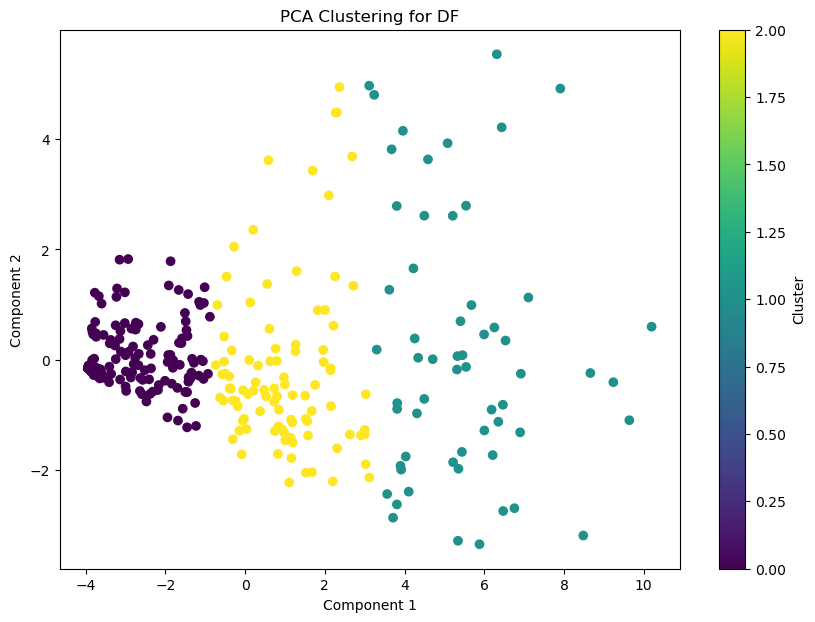

Silhouette Score for PCA on DF: 0.49
Cluster 0:
['Princess Ademiluyi', 'Michelle Agyemang', 'Alyssa Aherne', 'Asmita Ale', 'Asmita Ale', 'Mackenzie Arnold', 'Izzy Atkinson', 'Rosella Ayane', 'Sophie Baggaley', 'Ava Baker', 'Jennifer Beattie', 'Agnes Beever-Jones', 'Francesca Bentley', 'Ann-Katrin Berger', 'Marika Bergman-Lundin', 'Nathalie Björn', 'Nathalie Björn', 'Stina Blackstenius', 'Julie Blakstad', 'Laura Blindkilde', 'Ellie Brazil', 'Courtney Brosnan', 'Kadeisha Buchanan', 'Jasmine Bull', 'Hannah Cain', 'Megan Campbell', 'Jelena Čanković', 'Deyna Castellanos', 'Olivia Clark', 'Laia Codina', 'Kyra Cooney-Cross', "Sabrina D'Angelo", 'Eleanor Dale', 'Yana Daniels', 'Lily Dent', 'Daphne van Domselaar', 'Denny Draper', 'Toni Duggan', 'Mary Earps', 'Mia Enderby', 'Bethany England', 'Gemma Evans', 'Lisa Evans', 'Lisa Evans', 'Nicky Evrard', 'Melisa Filis', 'Mia Fishel', 'Keira Flannery', 'Jessie Fleming', 'Natasha Flint', 'Rachel Furness', 'Gabrielle George', 'Missy Goodwin', 'Charlott

C:\Users\theod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\theod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


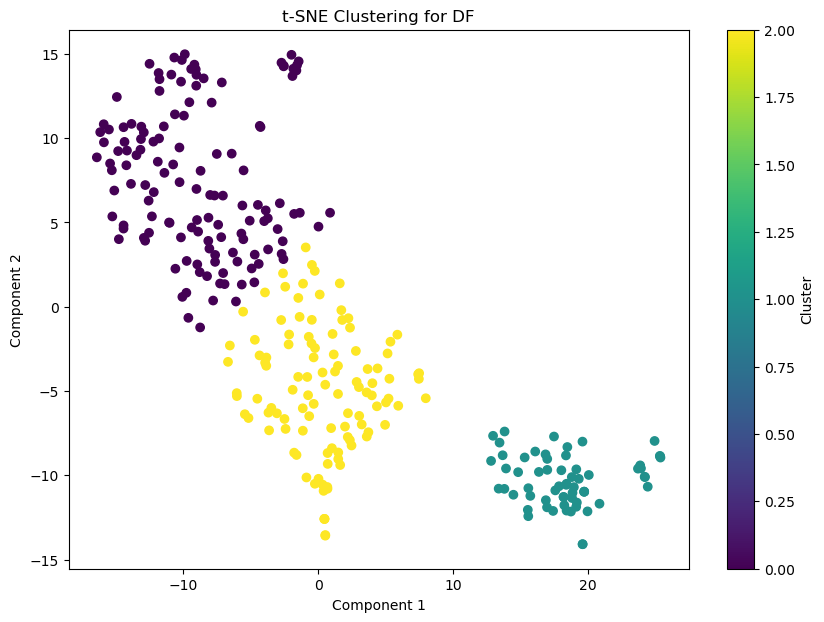

Silhouette Score for t-SNE on DF: 0.57
Cluster 2:
['Princess Ademiluyi', 'Asmita Ale', 'Asmita Ale', 'Mackenzie Arnold', 'Izzy Atkinson', 'Rosella Ayane', 'Jennifer Beattie', 'Agnes Beever-Jones', 'Marika Bergman-Lundin', 'Emma Bissell', 'Nathalie Björn', 'Nathalie Björn', 'Julie Blakstad', 'Millie Bright', 'Kadeisha Buchanan', 'Luana Bühler', 'Jasmine Bull', 'Hannah Cain', 'Megan Campbell', 'Jelena Čanković', 'Deyna Castellanos', 'Laia Codina', 'Kyra Cooney-Cross', "Sabrina D'Angelo", 'Eleanor Dale', 'Yana Daniels', 'Daphne van Domselaar', 'Denny Draper', 'Toni Duggan', 'Mia Enderby', 'Bethany England', 'Gemma Evans', 'Lisa Evans', 'Niamh Fahey', 'Melisa Filis', 'Jessie Fleming', 'Emily Fox', 'Rachel Furness', 'Gabrielle George', 'Lee Geum-min', 'Missy Goodwin', 'Lucy Graham', 'Charlotte Grant', 'Madison Haley', 'Maika Hamano', 'Emma Harries', 'Abigail Harrison', 'Karen Holmgaard', 'Lina Hurtig', 'Amanda Ilestedt', 'Sophie Ingle', 'Khiara Keating', 'Alanna Kennedy', 'Sam Kerr', 'Leann

C:\Users\theod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\theod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


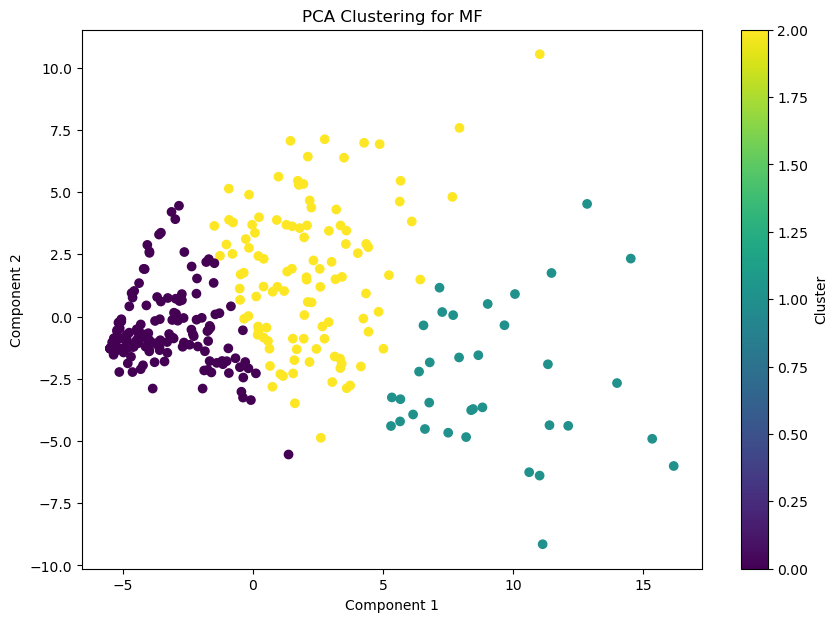

Silhouette Score for PCA on MF: 0.46
Cluster 0:
['Princess Ademiluyi', 'Michelle Agyemang', 'Alyssa Aherne', 'Asmita Ale', 'Asmita Ale', 'Mackenzie Arnold', 'Brooke Aspin', 'Izzy Atkinson', 'Rosella Ayane', 'Sophie Baggaley', 'Ava Baker', 'Jennifer Beattie', 'Francesca Bentley', 'Ann-Katrin Berger', 'Marika Bergman-Lundin', 'Emma Bissell', 'Nathalie Björn', 'Nathalie Björn', 'Stina Blackstenius', 'Julie Blakstad', 'Laura Blindkilde', 'Laura Blindkilde', 'Ellie Brazil', 'Courtney Brosnan', 'Kadeisha Buchanan', 'Jasmine Bull', 'Hannah Cain', 'Megan Campbell', 'Jelena Čanković', 'Deyna Castellanos', 'Olivia Clark', 'Laia Codina', 'Shannon Cooke', 'Kyra Cooney-Cross', "Sabrina D'Angelo", 'Eleanor Dale', 'Yana Daniels', 'Lily Dent', 'Daphne van Domselaar', 'Denny Draper', 'Toni Duggan', 'Mary Earps', 'Mia Enderby', 'Bethany England', 'Gemma Evans', 'Lisa Evans', 'Nicky Evrard', 'Niamh Fahey', 'Melisa Filis', 'Mia Fishel', 'Keira Flannery', 'Jessie Fleming', 'Natasha Flint', 'Rachel Furness'

In [ ]:
# Application and visualization for each position
for pos in positions:
    features = features_by_pos[pos]
    X_scaled, indices = preprocess_data(df, features)
    
    # PCA
    X_pca, explained_variance_ratio = apply_pca(X_scaled)
    print(f"Explained variance by PCA components for {pos}:")
    for i, variance in enumerate(explained_variance_ratio):
        print(f"Component {i + 1}: {variance:.2f}")
    labels_pca, silhouette_avg_pca = clustering_and_evaluation(X_pca)
    visualize_clusters(X_pca, labels_pca, f'PCA Clustering for {pos}')
    print(f"Silhouette Score for PCA on {pos}: {silhouette_avg_pca:.2f}")
    display_player_names(df, labels_pca, indices)
    
    # t-SNE
    X_tsne = apply_tsne(X_scaled)
    labels_tsne, silhouette_avg_tsne = clustering_and_evaluation(X_tsne)
    visualize_clusters(X_tsne, labels_tsne, f't-SNE Clustering for {pos}')
    print(f"Silhouette Score for t-SNE on {pos}: {silhouette_avg_tsne:.2f}")
    display_player_names(df, labels_tsne, indices)
